# 프로젝트 1. 선형회귀 설계하여 당뇨병 수치 맞춰보자

## (1) 데이터 가져오기

In [26]:
# 모듈, 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.datasets as sd
from sklearn.model_selection import train_test_split

In [27]:
# 데이터셋 살펴보기
diabetes = sd.load_diabetes()

# diabetes 타입
print(type(diabetes))
# diabetes 안에 담긴 정보 확인하기
print(diabetes.keys())
# 데이터를 따로 변수에 저장
db_data = diabetes.data
# db_data 형상정보 출력
print(db_data.shape)
# 샘플 확인
print(db_data[0])

# label
db_label = diabetes.target
print(db_label.shape)
print(diabetes.feature_names)

print(diabetes.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp

In [28]:
# df_X, df_y = sd.load_diabetes(return_X_y=True)
df_X, df_y = diabetes.data, diabetes.target

print(df_X.shape)
print(df_y.shape)
print(type(df_y))

(442, 10)
(442,)
<class 'numpy.ndarray'>


## (2) 모델에 입력할 데이터 `X` 준비하기

In [29]:
X=df_X
y=pd.DataFrame(df_y).to_numpy() 
print(y.shape)

y=df_y
print(y.shape)

(442, 1)
(442,)


In [30]:
type(X)

numpy.ndarray

## (3) 모델에 예측할 데이터 `y` 준비하기

In [31]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(442,)


## (4) train, test 떼이터로 분리하기

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 **`W`**와 **`b`**를 준비해주세요.
- 모델 함수를 구현해주세요.

In [33]:
W = np.random.rand(10)
b = np.random.rand()
print(W, b)

[0.33437582 0.88461612 0.42041461 0.25858825 0.6415775  0.6842004
 0.22434106 0.68607347 0.62197929 0.21196238] 0.35776965170608566


In [34]:
W

array([0.33437582, 0.88461612, 0.42041461, 0.25858825, 0.6415775 ,
       0.6842004 , 0.22434106, 0.68607347, 0.62197929, 0.21196238])

In [35]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [36]:
len(model(X,W,1))

442

## (6) 손실함수 `loss` 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [37]:
def MSE(a, b):
    mse = ((a-b) ** 2).mean()
    return mse

In [38]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [39]:
loss(X,W,b,y)

28955.834951553712

## (7) 기울기를 구하는 `gradient` 함수 구현하기

In [40]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [41]:
print(X.shape)
print(y.shape)
#error=model(X,W,b)-y
#error.shape
#y_train.value

(442, 10)
(442,)


In [42]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
print(type(dW))

dW: [ -60.57164922  -13.65457225 -189.57445542 -142.64895505  -68.18805608
  -55.89992543  127.57895064 -138.89760756 -182.80454803 -123.50796562]
db: -303.5514290223797
<class 'numpy.ndarray'>


## (8) 하이퍼 파라미터인 학습률 설정하기

In [43]:
LEARNING_RATE = 0.0001

In [44]:
print(type(dW))
print(dW)

<class 'numpy.ndarray'>
[ -60.57164922  -13.65457225 -189.57445542 -142.64895505  -68.18805608
  -55.89992543  127.57895064 -138.89760756 -182.80454803 -123.50796562]


## (9) 모델 학습하기

In [45]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration # %d : Loss %0.4f' % (i, L))

Iteration # 10 : Loss 28859.8424
Iteration # 20 : Loss 28764.2276
Iteration # 30 : Loss 28668.9891
Iteration # 40 : Loss 28574.1254
Iteration # 50 : Loss 28479.6350
Iteration # 60 : Loss 28385.5165
Iteration # 70 : Loss 28291.7682
Iteration # 80 : Loss 28198.3889
Iteration # 90 : Loss 28105.3769
Iteration # 100 : Loss 28012.7309
Iteration # 110 : Loss 27920.4493
Iteration # 120 : Loss 27828.5308
Iteration # 130 : Loss 27736.9738
Iteration # 140 : Loss 27645.7769
Iteration # 150 : Loss 27554.9388
Iteration # 160 : Loss 27464.4579
Iteration # 170 : Loss 27374.3328
Iteration # 180 : Loss 27284.5622
Iteration # 190 : Loss 27195.1446
Iteration # 200 : Loss 27106.0786
Iteration # 210 : Loss 27017.3628
Iteration # 220 : Loss 26928.9958
Iteration # 230 : Loss 26840.9763
Iteration # 240 : Loss 26753.3027
Iteration # 250 : Loss 26665.9738
Iteration # 260 : Loss 26578.9882
Iteration # 270 : Loss 26492.3446
Iteration # 280 : Loss 26406.0414
Iteration # 290 : Loss 26320.0775
Iteration # 300 : Loss 

Iteration # 3670 : Loss 10231.1870
Iteration # 3680 : Loss 10208.1619
Iteration # 3690 : Loss 10185.2245
Iteration # 3700 : Loss 10162.3744
Iteration # 3710 : Loss 10139.6113
Iteration # 3720 : Loss 10116.9347
Iteration # 3730 : Loss 10094.3444
Iteration # 3740 : Loss 10071.8401
Iteration # 3750 : Loss 10049.4213
Iteration # 3760 : Loss 10027.0878
Iteration # 3770 : Loss 10004.8392
Iteration # 3780 : Loss 9982.6752
Iteration # 3790 : Loss 9960.5954
Iteration # 3800 : Loss 9938.5995
Iteration # 3810 : Loss 9916.6872
Iteration # 3820 : Loss 9894.8581
Iteration # 3830 : Loss 9873.1120
Iteration # 3840 : Loss 9851.4484
Iteration # 3850 : Loss 9829.8671
Iteration # 3860 : Loss 9808.3678
Iteration # 3870 : Loss 9786.9500
Iteration # 3880 : Loss 9765.6136
Iteration # 3890 : Loss 9744.3581
Iteration # 3900 : Loss 9723.1833
Iteration # 3910 : Loss 9702.0887
Iteration # 3920 : Loss 9681.0742
Iteration # 3930 : Loss 9660.1394
Iteration # 3940 : Loss 9639.2840
Iteration # 3950 : Loss 9618.5077
Ite

Iteration # 6230 : Loss 6439.6615
Iteration # 6240 : Loss 6430.7806
Iteration # 6250 : Loss 6421.9316
Iteration # 6260 : Loss 6413.1145
Iteration # 6270 : Loss 6404.3291
Iteration # 6280 : Loss 6395.5754
Iteration # 6290 : Loss 6386.8530
Iteration # 6300 : Loss 6378.1620
Iteration # 6310 : Loss 6369.5023
Iteration # 6320 : Loss 6360.8736
Iteration # 6330 : Loss 6352.2760
Iteration # 6340 : Loss 6343.7091
Iteration # 6350 : Loss 6335.1730
Iteration # 6360 : Loss 6326.6676
Iteration # 6370 : Loss 6318.1926
Iteration # 6380 : Loss 6309.7480
Iteration # 6390 : Loss 6301.3337
Iteration # 6400 : Loss 6292.9495
Iteration # 6410 : Loss 6284.5954
Iteration # 6420 : Loss 6276.2711
Iteration # 6430 : Loss 6267.9767
Iteration # 6440 : Loss 6259.7119
Iteration # 6450 : Loss 6251.4767
Iteration # 6460 : Loss 6243.2709
Iteration # 6470 : Loss 6235.0945
Iteration # 6480 : Loss 6226.9472
Iteration # 6490 : Loss 6218.8291
Iteration # 6500 : Loss 6210.7400
Iteration # 6510 : Loss 6202.6797
Iteration # 65

Iteration # 8680 : Loss 4977.8511
Iteration # 8690 : Loss 4974.0316
Iteration # 8700 : Loss 4970.2244
Iteration # 8710 : Loss 4966.4296
Iteration # 8720 : Loss 4962.6471
Iteration # 8730 : Loss 4958.8769
Iteration # 8740 : Loss 4955.1189
Iteration # 8750 : Loss 4951.3730
Iteration # 8760 : Loss 4947.6393
Iteration # 8770 : Loss 4943.9176
Iteration # 8780 : Loss 4940.2080
Iteration # 8790 : Loss 4936.5103
Iteration # 8800 : Loss 4932.8246
Iteration # 8810 : Loss 4929.1508
Iteration # 8820 : Loss 4925.4888
Iteration # 8830 : Loss 4921.8387
Iteration # 8840 : Loss 4918.2003
Iteration # 8850 : Loss 4914.5736
Iteration # 8860 : Loss 4910.9585
Iteration # 8870 : Loss 4907.3551
Iteration # 8880 : Loss 4903.7633
Iteration # 8890 : Loss 4900.1830
Iteration # 8900 : Loss 4896.6142
Iteration # 8910 : Loss 4893.0568
Iteration # 8920 : Loss 4889.5109
Iteration # 8930 : Loss 4885.9763
Iteration # 8940 : Loss 4882.4530
Iteration # 8950 : Loss 4878.9410
Iteration # 8960 : Loss 4875.4403
Iteration # 89

Iteration # 12150 : Loss 4157.5645
Iteration # 12160 : Loss 4156.1611
Iteration # 12170 : Loss 4154.7612
Iteration # 12180 : Loss 4153.3647
Iteration # 12190 : Loss 4151.9717
Iteration # 12200 : Loss 4150.5822
Iteration # 12210 : Loss 4149.1960
Iteration # 12220 : Loss 4147.8133
Iteration # 12230 : Loss 4146.4339
Iteration # 12240 : Loss 4145.0579
Iteration # 12250 : Loss 4143.6853
Iteration # 12260 : Loss 4142.3161
Iteration # 12270 : Loss 4140.9502
Iteration # 12280 : Loss 4139.5877
Iteration # 12290 : Loss 4138.2284
Iteration # 12300 : Loss 4136.8725
Iteration # 12310 : Loss 4135.5199
Iteration # 12320 : Loss 4134.1706
Iteration # 12330 : Loss 4132.8246
Iteration # 12340 : Loss 4131.4818
Iteration # 12350 : Loss 4130.1423
Iteration # 12360 : Loss 4128.8060
Iteration # 12370 : Loss 4127.4730
Iteration # 12380 : Loss 4126.1432
Iteration # 12390 : Loss 4124.8166
Iteration # 12400 : Loss 4123.4932
Iteration # 12410 : Loss 4122.1730
Iteration # 12420 : Loss 4120.8560
Iteration # 12430 : 

Iteration # 14810 : Loss 3876.8150
Iteration # 14820 : Loss 3876.0215
Iteration # 14830 : Loss 3875.2294
Iteration # 14840 : Loss 3874.4388
Iteration # 14850 : Loss 3873.6496
Iteration # 14860 : Loss 3872.8618
Iteration # 14870 : Loss 3872.0755
Iteration # 14880 : Loss 3871.2905
Iteration # 14890 : Loss 3870.5070
Iteration # 14900 : Loss 3869.7249
Iteration # 14910 : Loss 3868.9443
Iteration # 14920 : Loss 3868.1650
Iteration # 14930 : Loss 3867.3871
Iteration # 14940 : Loss 3866.6106
Iteration # 14950 : Loss 3865.8356
Iteration # 14960 : Loss 3865.0619
Iteration # 14970 : Loss 3864.2896
Iteration # 14980 : Loss 3863.5186
Iteration # 14990 : Loss 3862.7491
Iteration # 15000 : Loss 3861.9809
Iteration # 15010 : Loss 3861.2141
Iteration # 15020 : Loss 3860.4487
Iteration # 15030 : Loss 3859.6846
Iteration # 15040 : Loss 3858.9218
Iteration # 15050 : Loss 3858.1605
Iteration # 15060 : Loss 3857.4004
Iteration # 15070 : Loss 3856.6417
Iteration # 15080 : Loss 3855.8844
Iteration # 15090 : 

Iteration # 17180 : Loss 3721.2585
Iteration # 17190 : Loss 3720.7129
Iteration # 17200 : Loss 3720.1681
Iteration # 17210 : Loss 3719.6240
Iteration # 17220 : Loss 3719.0807
Iteration # 17230 : Loss 3718.5381
Iteration # 17240 : Loss 3717.9962
Iteration # 17250 : Loss 3717.4551
Iteration # 17260 : Loss 3716.9147
Iteration # 17270 : Loss 3716.3750
Iteration # 17280 : Loss 3715.8361
Iteration # 17290 : Loss 3715.2979
Iteration # 17300 : Loss 3714.7604
Iteration # 17310 : Loss 3714.2236
Iteration # 17320 : Loss 3713.6876
Iteration # 17330 : Loss 3713.1523
Iteration # 17340 : Loss 3712.6176
Iteration # 17350 : Loss 3712.0838
Iteration # 17360 : Loss 3711.5506
Iteration # 17370 : Loss 3711.0181
Iteration # 17380 : Loss 3710.4863
Iteration # 17390 : Loss 3709.9553
Iteration # 17400 : Loss 3709.4250
Iteration # 17410 : Loss 3708.8953
Iteration # 17420 : Loss 3708.3664
Iteration # 17430 : Loss 3707.8382
Iteration # 17440 : Loss 3707.3106
Iteration # 17450 : Loss 3706.7838
Iteration # 17460 : 

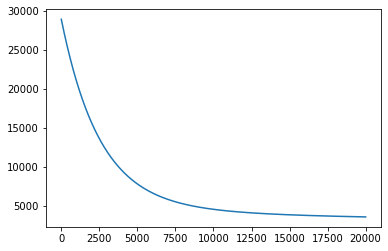

In [46]:
plt.plot(losses)
plt.show()

In [47]:
# W, b 확인
W, b

(array([  56.58524518,  -25.32717535,  221.82312882,  159.65116699,
          31.05852955,   10.61157797, -125.18310103,  119.99000119,
         187.72542319,  123.12518667]),
 149.90112186991888)

## (10) test 데이터에 대한 성능 확인하기

In [48]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3248.369053242001

## (11) 정답 데이터와 예측한 데이터 시각화하기

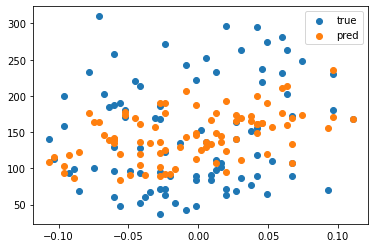

In [49]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

# 프로젝트 2 : 맑은 날 자전거 타는 사람 머릿수 추측하기

- Kaggle 데이터넷 가져오기
- 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제

    → 시간, 요일, 계절 모두 영향을 미칠 것

- 직접 손실함수와 기울기를 계산하지 않고 `sklearn`의 LinearRegression 모델 활용할 것(순서는 위와 그대로)

## (1) 데이터 가져오기

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

## (5) LinearRegression 모델 학습

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기